<a href="https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D



To complete given tasks I use data generated below. To visualise data I use the convention approved in class i.e. origin of data points is marked by different shapes and cluster to which the point was assigned is marked by different colors.

# Generating data
- 400 observations from $\mathcal{N}\left( \left( \begin{array}{c} 0 \\ 0 \end{array} \right), \left(\begin{array}{cc} 0.3 & 0.2 \\ 0.2 & 0.3 \end{array}\right)\right)$
- 200 observations from $\mathcal{N}\left( \left( \begin{array}{c} 1.6 \\ -0.6 \end{array} \right), \left(\begin{array}{cc} 0.2 & 0 \\ 0 & 0.2 \end{array}\right)\right)$
- 200 observations from $\mathcal{N}\left( \left( \begin{array}{c} -0.8 \\ 1.4 \end{array} \right), \left(\begin{array}{cc} 0.2 & 0 \\ 0 & 02 \end{array}\right)\right)$

In [84]:
np.random.seed(0)

mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.3, 0.2],
                 [0.2,  0.3]])
data1 = np.random.multivariate_normal(mean1, cov1, 400)

mean2 = np.array([1.6, -0.6])
cov2 = np.array([[0.2, 0],
                 [0,  0.2]])
data2 = np.random.multivariate_normal(mean2, cov2, 200)

mean3 = np.array([-0.8, 1.4])
cov3 = np.array([[0.2, 0],
                 [0,  0.2]])
data3 = np.random.multivariate_normal(mean3, cov3, 200)


# Data visualisation

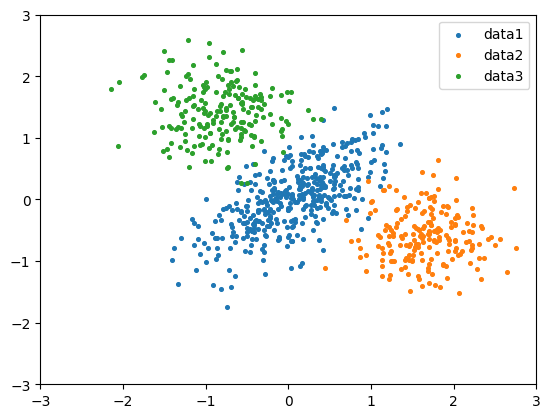

In [85]:
plt.scatter(data1[:,0], data1[:,1], marker='o', s=7, label = "data1")
plt.scatter(data2[:,0], data2[:,1], marker='o', s=7, label = "data2")
plt.scatter(data3[:,0], data3[:,1], marker='o', s=7, label = "data3")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()

Let's start with following question:
# **If we didn't know the number of clusters in advance, how could we decide on a suitable  K  for the clustering algorithm?**
The question is about how to choose number of clusters. I decided to use **Silhouette score** and **Calinski-Harabsz index** to evaluate quality of clasterization.
- Silhouette score was introduced in class.
- Calinski-Harabasz Index (CH) is defined as the ratio of the between-cluster sum of squares (BCSS) to the within-cluster sum of squares (WCSS), normalized by their number of degrees of freedom
$$ CH = \frac{BCSS/(k-1)}{WCSS/(n-k)} $$
k - number of clusters\
n - number of data points

High value of CH indicates a better clustering

Below is the visualisation of this problem. I use EM alghoritm for clustering.

In [86]:
data_X = np.vstack([data1, data2, data3])

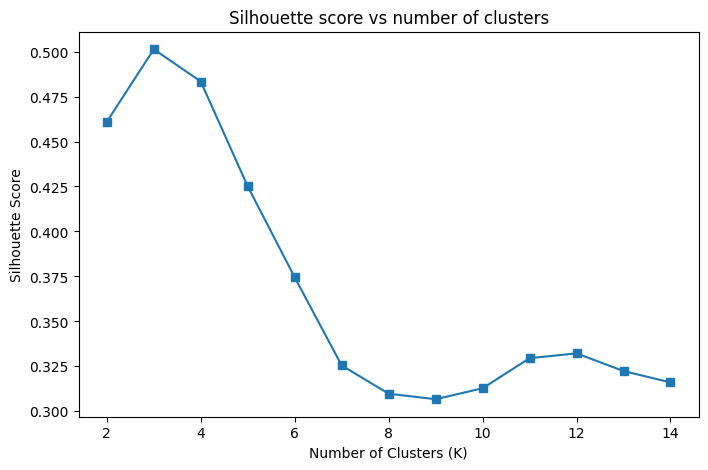

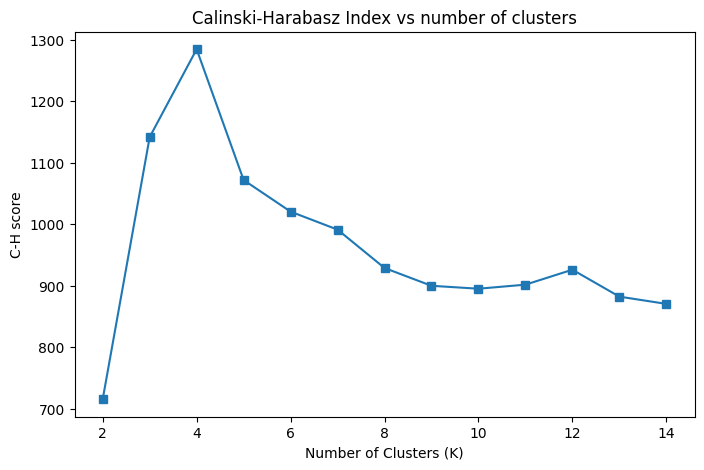

In [87]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture

K = range(2,15)
sil_scores = []
ch_scores = []
for k in K:
    model = GaussianMixture(n_components=k, random_state=0)
    model.fit(data_X)
    labels = model.predict(data_X)
    sil_scores.append(silhouette_score(data_X, labels))
    ch_scores.append(calinski_harabasz_score(data_X, labels))

plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, marker='s', linestyle='-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title("Silhouette score vs number of clusters")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(K, ch_scores, marker='s', linestyle='-', label='Calinski-Harabasz Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('C-H score')
plt.title("Calinski-Harabasz Index vs number of clusters")
plt.show()

Best silhouette score has been obtained for K=3 which is consistent with number of independent probability distribution from the data was drawn. Suprisingly, C-H index was highest for K=4 and even for K>4 remained relatively big.\
I think the reason is the shape of one of normal distribution is "elongate", in particular covariance matrix is non-diagonal. In consequence, distances between points in this elongate cluster are quite big and WCSS is increased.\
Adding extra cluster leads to lower WCSS and despite of decreasing value of BCSS by using greater K, C-H index is higher than for K=3.\
Silhouette score remains highest for K=3 although for K=4 it was high too.\
To determine if genuine reason of this phenomenon is splitting that elongate cluster we can look at the visualisation of clustering results for K=3 and for K=4.

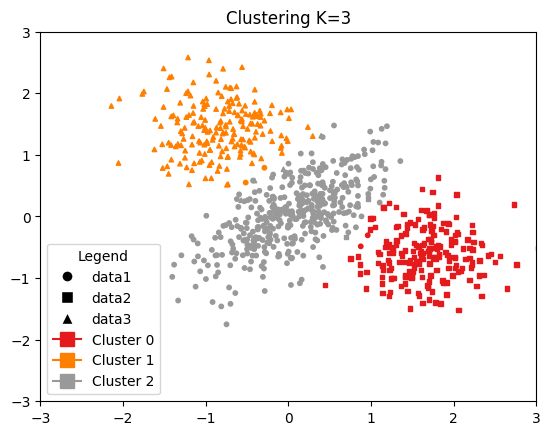

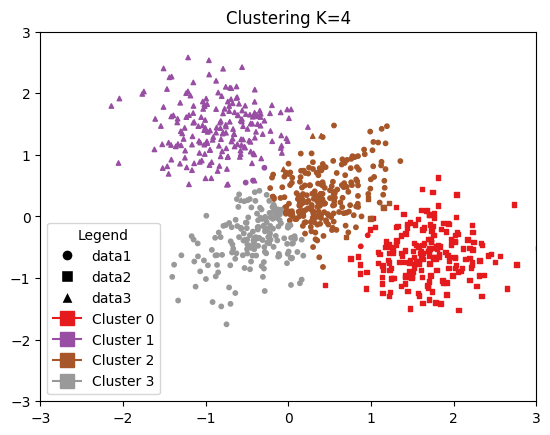

In [88]:
model1 = GaussianMixture(n_components=3, random_state=0)
model1.fit(data_X)
labels1 = model1.predict(data_X)

model2 = GaussianMixture(n_components=4, random_state=0)
model2.fit(data_X)
labels2 = model2.predict(data_X)

markers = ['o', 's', '^']
data_counts = [len(data1), len(data2), len(data3)]

for i in (1,2):
  labels = labels1 if i==1 else labels2
  norm = Normalize(vmin=0, vmax=i+1)
  start = 0
  for original_group in range(3):
    end = start + data_counts[original_group]
    plt.scatter(data_X[start:end,0], data_X[start:end,1], c=labels[start:end], marker=markers[original_group],cmap='Set1', s=10, norm=norm)
    start = end

  legend_elements = [
      Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='data1'),
      Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='data2'),
      Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='data3'),

      Line2D([0], [0], marker='s', color=plt.cm.Set1(norm(0)), markersize=10, label='Cluster 0'),
      Line2D([0], [0], marker='s', color=plt.cm.Set1(norm(1)), markersize=10, label='Cluster 1'),
      Line2D([0], [0], marker='s', color=plt.cm.Set1(norm(2)), markersize=10, label='Cluster 2')
    ]

  if i==2:
    legend_elements += [Line2D([0], [0], marker='s', color=plt.cm.Set1(norm(3)), markersize=10, label='Cluster 3')]

  plt.legend(handles=legend_elements, loc='best', frameon=True, title="Legend")
  plt.title(f"Clustering K={3 if i==1 else 4}")
  plt.xlim(-3, 3)
  plt.ylim(-3, 3)
  plt.show()



As we can see, if we choose K=4 the extra cluster contains mainly points from divided elongate cluster.

**The conclusion is** that we have methods that help us decide on the number of clusters to choose. However, as we have seen above, they are not always conclusive, especially when the data structure is complex. It is advisable to consider multiple metrics and visualize the results. Nevertheless, the interpretation of the outcome is often subjective

# **How can we visualize the decision boundary for attributing a new (unlabeled) point to one of the GMM clusters?**

Let's note that\
Each point on the plane can be assigned the probability density function values for each of the components (corresponding to clusters). Among these values, we select the highest one and the probability distribution it belongs to. This way, for any given point, we can determine which cluster boundary it lies within.

The implementation is as follows: we divide the area into points (here: 600x600 = 360,000) and estimate the probability density value for each point using the .*predict_proba()* function of the model. Then, we color each cell according to the component whose density was the highest at that point. This results in a visualization of the boundaries of the individual clusters.

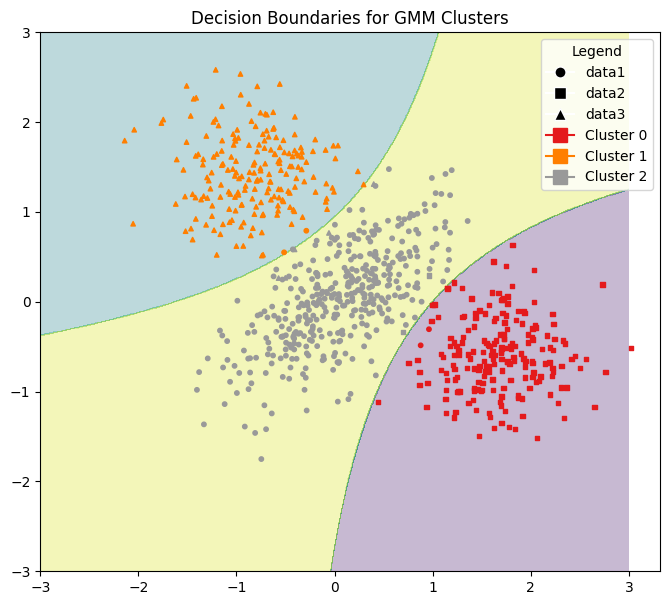

In [89]:
model1 = GaussianMixture(n_components=3, random_state=0)
model1.fit(data_X)
labels1 = model1.predict(data_X)

markers = ['o', 's', '^']
data_counts = [len(data1), len(data2), len(data3)]

gx, gy = np.meshgrid(np.linspace(-3, 3, 600), np.linspace(-3, 3, 600))
grid = np.c_[gx.ravel(), gy.ravel()]

probs = model1.predict_proba(grid)
dominants = np.argmax(probs, axis=1)
dominants = dominants.reshape(gx.shape)

plt.figure(figsize=(8, 7))
plt.contourf(gx, gy, dominants, alpha=0.3, cmap='viridis')

norm = Normalize(vmin=0, vmax=2)
start = 0
for original_group in range(3):
    end = start + data_counts[original_group]
    plt.scatter(data_X[start:end,0], data_X[start:end,1], c=labels1[start:end], marker=markers[original_group],cmap='Set1', s=10, norm=norm)
    start = end

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='data1'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='data2'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='data3'),

    Line2D([0], [0], marker='s', color=plt.cm.Set1(norm(0)), markersize=10, label='Cluster 0'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(norm(1)), markersize=10, label='Cluster 1'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(norm(2)), markersize=10, label='Cluster 2')
  ]

plt.legend(handles=legend_elements, loc='best', frameon=True, title="Legend")
plt.title("Decision Boundaries for GMM Clusters")
plt.show()

Note that some points lie within the boundaries of clusters corresponding to distributions they did not originate from. This is a common observation. The points were drawn from normal distributions which, as we know, are $\mathbb{R}^2$
 -supported. Consequently, even if another distribution has a higher probability density function value at some location, a data point sampled from a normal distribution can still be found there.